### SIMA
SIMA is a fully featured toolbox including motion correction and cell detection. Here we illustrate how one can integrate FISSA into their workflow.

For more information about the toolbox see: http://www.losonczylab.org/sima/1.3.2/

Imports

In [1]:
# sima
import sima
import sima.segment

# Plotting toolbox
import holoviews as hv
%load_ext holoviews.ipython

# file operations
import glob


/home/swk/.virtualenvs/main/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Setup data

In [2]:
# Define folder where tiffs are present
folder = '../exampleData/20150529_mini/'

# Find tiffs in folder
tiffs  = sorted(glob.glob(folder+'/*.tif'))

# define SIMA dataset
sequences = [sima.Sequence.create('TIFF', tiff) for tiff in tiffs[:1]]
dataset = sima.ImagingDataset(sequences, 'example.sima')


Detect cells with sima

In [3]:
stica_approach = sima.segment.STICA(components=10)
stica_approach.append(sima.segment.SparseROIsFromMasks())
stica_approach.append(sima.segment.SmoothROIBoundaries())
stica_approach.append(sima.segment.MergeOverlapping(threshold=0.5))
rois = dataset.segment(stica_approach, 'auto_ROIs')

Show detected cells

:Overlay
   .Curve.I    :Curve   [x]   (y)
   .Curve.II   :Curve   [x]   (y)
   .Curve.III  :Curve   [x]   (y)
   .Curve.IV   :Curve   [x]   (y)
   .Curve.V    :Curve   [x]   (y)
   .Curve.VI   :Curve   [x]   (y)
   .Curve.VII  :Curve   [x]   (y)
   .Curve.VIII :Curve   [x]   (y)
   .Curve.IX   :Curve   [x]   (y)
   .Curve.X    :Curve   [x]   (y)
   .Curve.XI   :Curve   [x]   (y)
   .Curve.XII  :Curve   [x]   (y)
   .Curve.XIII :Curve   [x]   (y)
   .Curve.XIV  :Curve   [x]   (y)
   .Curve.XV   :Curve   [x]   (y)
   .Curve.XVI  :Curve   [x]   (y)
   .Curve.XVII :Curve   [x]   (y)
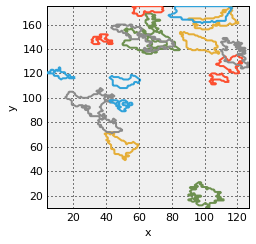

In [4]:
fig = hv.Overlay()
for i in range(len(rois)):
    fig*=hv.Curve(rois[i].coords[0][:,:2])
fig

Use FISSA with SIMA detected cells

Output of SIMA is as arrays, needs to be put into FISSA.